In [62]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
%pylab inline --no-import-all

In [291]:
places = ['socal', 'oc', 'newport', 'newportbeach', 'irvine', 'tustin', 'orangecounty','missionviejo', 'costamesa', 'orange', 'huntingtonbeach']
others = ['bossbabe', 'fitfam', 'bestgym', 'bestworkout', 'repost', 'photography', 'love', '2017', 'birthday', 'happybirthday', 'tbt']

In [292]:
def CollectTags(f):
    json_data = open("./SampleSet/"+f+"/"+f+".json")
    j = json.load(json_data)
    json_data.close()
    totalTags = ""
    for i in range(len(j)):
        if 'tags' in j[i].keys():
            try:
                listostring=[]
                for b in j[i]['tags']:
                    if (b.lower() in places or b.lower() in others or b == f): continue
                    else: listostring.append(b)
                string = " " + " ".join(listostring)
                #string = " " + " ".join(b for b in j[i]['tags'] if (b.lower() not in places or b.lower() not in others
                #                       or b == f))
                if ' irvine ' in string: print ("da fuck")
                totalTags += string
            except:
                pass
    return totalTags
        


In [293]:
titles = os.listdir("./SampleSet")
genres = ['HIIT circuit',"HIIT circuit", "Martial Arts", "Kickboxing", "Barre", "Yoga", "Barre", "HIIT circuit", "Yoga",
         "Cycling", "Yoga", "Yoga", "Barre", "Marital Arts", "Kickboxing", "Pilates", "Yoga", "Pilates", "Crossfit", "Crossfit",
         "Yoga", "Barre", "HIIT circuit", "Pilates", "HIIT circuit", "Cycling", "HIIT cicuit", "Kickboxing", "HIIT circuit",
         "Yoga", "Everything", "HIIT circuit", "Marital Arts", "Marital Arts", "HIIT ciruit", "Pilates", "Pilates", "Pilates", 
         "Yoga", "Yoga", "Marital Arts", "Yoga", "Yoga", "Everything", "Yoga", "Marital Arts", "Pilates", "Marital Arts",
         "Yoga", "HIIT circuit", "Cycling", "Yoga", "Yoga", "Yoga"]
hashtags = [CollectTags(f) for f in os.listdir("./SampleSet")]
ranks = [i for i in range(len(hashtags))]
print (titles)
#print (hashtags[0])

['12life', '3dfitnessgymoc', '5elementsbruce', '9round', 'alkalignme', 'bakerranchyoga', 'barmethod', 'barrysbootcamp', 'bethechangeyoga', 'bike2thebeattustin', 'bikramyogairvine', 'caffeyoga', 'cardiobarre', 'carrillomuaythai', 'ckonorthtustin', 'clubpilates', 'corepoweryoga', 'corereform', 'crossfitinsanity', 'crossfittustin', 'ekamyoga', 'enerjibarre', 'fitnessonfire', 'fitpilatesstudio', 'fitwall', 'freedomride', 'hdxfit', 'ilovekickboxing', 'kaiafit', 'mixxyoga', 'neaumixfit', 'ocfit', 'ockmma', 'onejiujitsu', 'orangetheoryfitness', 'pilatesonpurpose', 'pilatespluscycle', 'pureempower', 'radianthotyoga', 'rayoga', 'roundersmma', 'spectrayoga', 'stellalunayoga', 'studiofixx', 'sunsparkyoga', 'teamoyama', 'thehauteroom', 'totalmmastudios', 'triadyogaandpilates', 'trimfitnessstudio', 'unionryde', 'vibeshotyoga', 'wildsideyoga', 'yogashaktistudio']


In [315]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, max_features=200000, min_df=0.3, ngram_range=(1,1))
                                 #min_df=0.2, stop_words='english',
                                 #use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(hashtags)

print(tfidf_matrix.shape)

CPU times: user 407 ms, sys: 11.3 ms, total: 418 ms
Wall time: 416 ms
(54, 242)


In [316]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

['abs', 'adventure', 'amazing', 'athlete', 'badass', 'balance', 'barre', 'beach', 'beast', 'beastmode', 'beautiful', 'beauty', 'beyou', 'blessed', 'body', 'bodybuilding', 'bootcamp', 'booty', 'boxing', 'breathe', 'california', 'cardio', 'challenge', 'challengeyourself', 'cleaneating', 'coach', 'coffee', 'community', 'consistency', 'core', 'crossfit', 'cycling', 'dance', 'dedication', 'determination', 'detox', 'diet', 'dreams', 'eatclean', 'energy', 'exercise', 'family', 'fashion', 'fbf', 'feeltheburn', 'fit', 'fitchick', 'fitchicks', 'fitforlife', 'fitgirl', 'fitgirls', 'fitlife', 'fitmom', 'fitness', 'fitnessaddict', 'fitnessfriday', 'fitnessgoals', 'fitnessinspiration', 'fitnessjourney', 'fitnessmodel', 'fitnessmotivation', 'fitspiration', 'fitspo', 'flashbackfriday', 'flex', 'flexfriday', 'flexibility', 'flow', 'focus', 'food', 'free', 'friday', 'friends', 'friyay', 'fun', 'gains', 'getfit', 'getit', 'girlpower', 'girlswholift', 'glutenfree', 'goals', 'goodmorning', 'goodtimes', 'go

In [317]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [318]:
num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 220 ms, sys: 1.56 ms, total: 222 ms
Wall time: 221 ms


In [319]:
studios = { 'title': titles, 'rank': ranks, 'hashtags': hashtags, 'cluster': clusters, 'genre': genres }

frame = pd.DataFrame(studios, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

In [320]:
frame['cluster'].value_counts()

3    15
5    11
1     8
4     7
2     6
0     5
6     2
Name: cluster, dtype: int64

grouped = frame['rank'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

grouped.mean() #average rank (1 to 100) per cluster

In [321]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

cluster_names = {}
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    cluster_names[i]=""
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        cluster_names[i] += terms[ind].split(' ')[0] + " "
        print(' %s' % terms[ind].split(' ')[0], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d group:" % i, end='')
    for g in frame.loc[i]['genre'].values.tolist():
        print(' %s,' % g, end='')
    print() #add whitespace
    print() #add whitespace
    
print()

Top terms per cluster:

Cluster 0 words: barre, fitness, cardio, workout, motivation, hiit,

Cluster 0 titles: alkalignme, barmethod, cardiobarre, enerjibarre, pureempower,

Cluster 0 group: Barre, Barre, Barre, Barre, Pilates,

Cluster 1 words: kickboxing, boxing, fitness, workout, gym, training,

Cluster 1 titles: 5elementsbruce, 9round, carrillomuaythai, ckonorthtustin, ilovekickboxing, roundersmma, teamoyama, totalmmastudios,

Cluster 1 group: Martial Arts, Kickboxing, Marital Arts, Kickboxing, Kickboxing, Marital Arts, Marital Arts, Marital Arts,

Cluster 2 words: yoga, namaste, community, meditation, yogi, peace,

Cluster 2 titles: bakerranchyoga, bethechangeyoga, caffeyoga, radianthotyoga, sunsparkyoga, wildsideyoga,

Cluster 2 group: Yoga, Yoga, Yoga, Yoga, Yoga, Yoga,

Cluster 3 words: fitness, workout, fit, fitnessmotivation, bootcamp, fitlife,

Cluster 3 titles: 12life, 3dfitnessgymoc, barrysbootcamp, bike2thebeattustin, fitnessonfire, fitwall, hdxfit, kaiafit, ocfit, ockmma

In [322]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5:'blue', 6:'cyan'}

In [323]:
from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

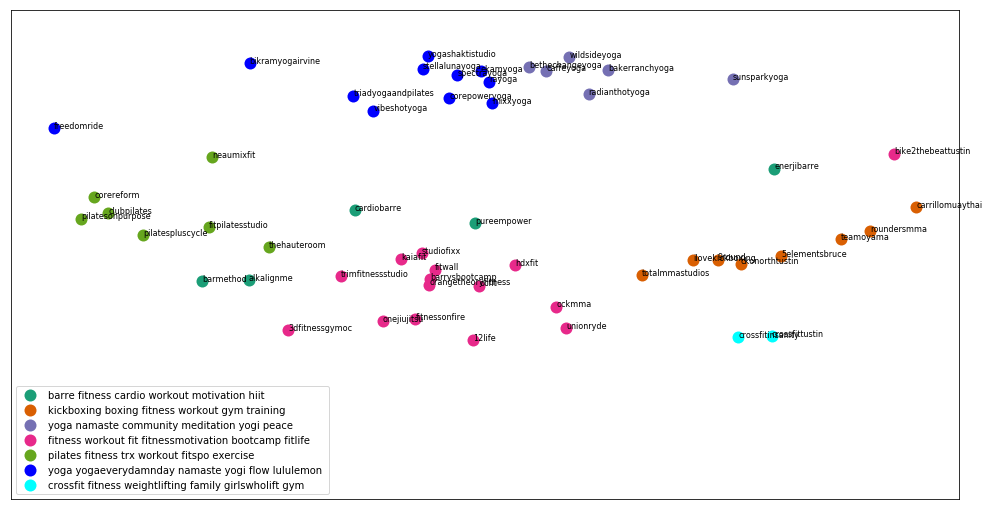

In [324]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#ax.set_xlim([-1,1] )
ax.set_ylim([-1.3,.85])
#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)  

    
    
#plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [327]:
import urllib.request as urllib
from bs4 import BeautifulSoup

In [330]:
page = urllib.urlopen('http://mixxyoga.com/our-story/')
soup = BeautifulSoup(page, 'html.parser')

In [343]:
story_box = soup.find('div', attrs={'class': 'story'})
timeline_box = soup.find('div', attrs={'class': 'timeline'})

In [344]:
story = story_box.text.strip() # strip() is used to remove starting and trailing
print (story)
timeline = timeline_box.text.strip() # strip() is used to remove starting and trailing
print (timeline)

BACKGROUND
Our founder, Dr. Mitra Hooshmand, embodies empowerment, both literally and figuratively! A former competitive swimmer, she earned her Ph.D. in Neuroscience from UC Irvine, where she continues to passionately research a cure for paralysis. It was in 2012, however, when Mitra took her biggest leap of faith – starting her Mixx Yoga journey. Obsessed with the practice of yoga, Mitra combined her scientific training with her athletic experience to create a workout that would challenge the body and push the mind to its highest potential. Her goal: to inspire others to live empowered.
Mitra was later joined by four amazing and equally empowering women, each of whom believe in the power of Mixx to change lives. They are Priya Gohil, Sholeh Forouzan, Kalila Magbanua-Stein, and Sahara George. Together with Mitra Hooshmand, these women serve as the Mixx Yoga executive board. At your service!
At Mixx Yoga, we believe that an ancient practice can be modern. With us, you will always have 